This assignment will be due on Wednesday, February 9 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas. 

0. List the names of your group members, as well as any other class members you conferred with for this assignment.

> Rafael Piloto, 

1. Type and execute all snippets of code in Section 2.2 of the book and make sure that you understand the syntax and the output.

In [ ]:
import numpy as np

2. Alexander Calder was an American sculptor that is known for his innovative mobiles (e.g., see [here](https://calder.org/archive/all/works/hanging-mobile/)). Suppose that, inspired by Calder, we wanted to make a mobile like the one pictured below. Each $r_i$ value corresponds to the length of link $i$ from the vertical support to the end of the wire, and the mass, $m_i$, of block $i$ at the end of the mobile are labeled below the corresponding block. For simplicity, assume that all the wires in the mobile are massless and perfectly rigid. 

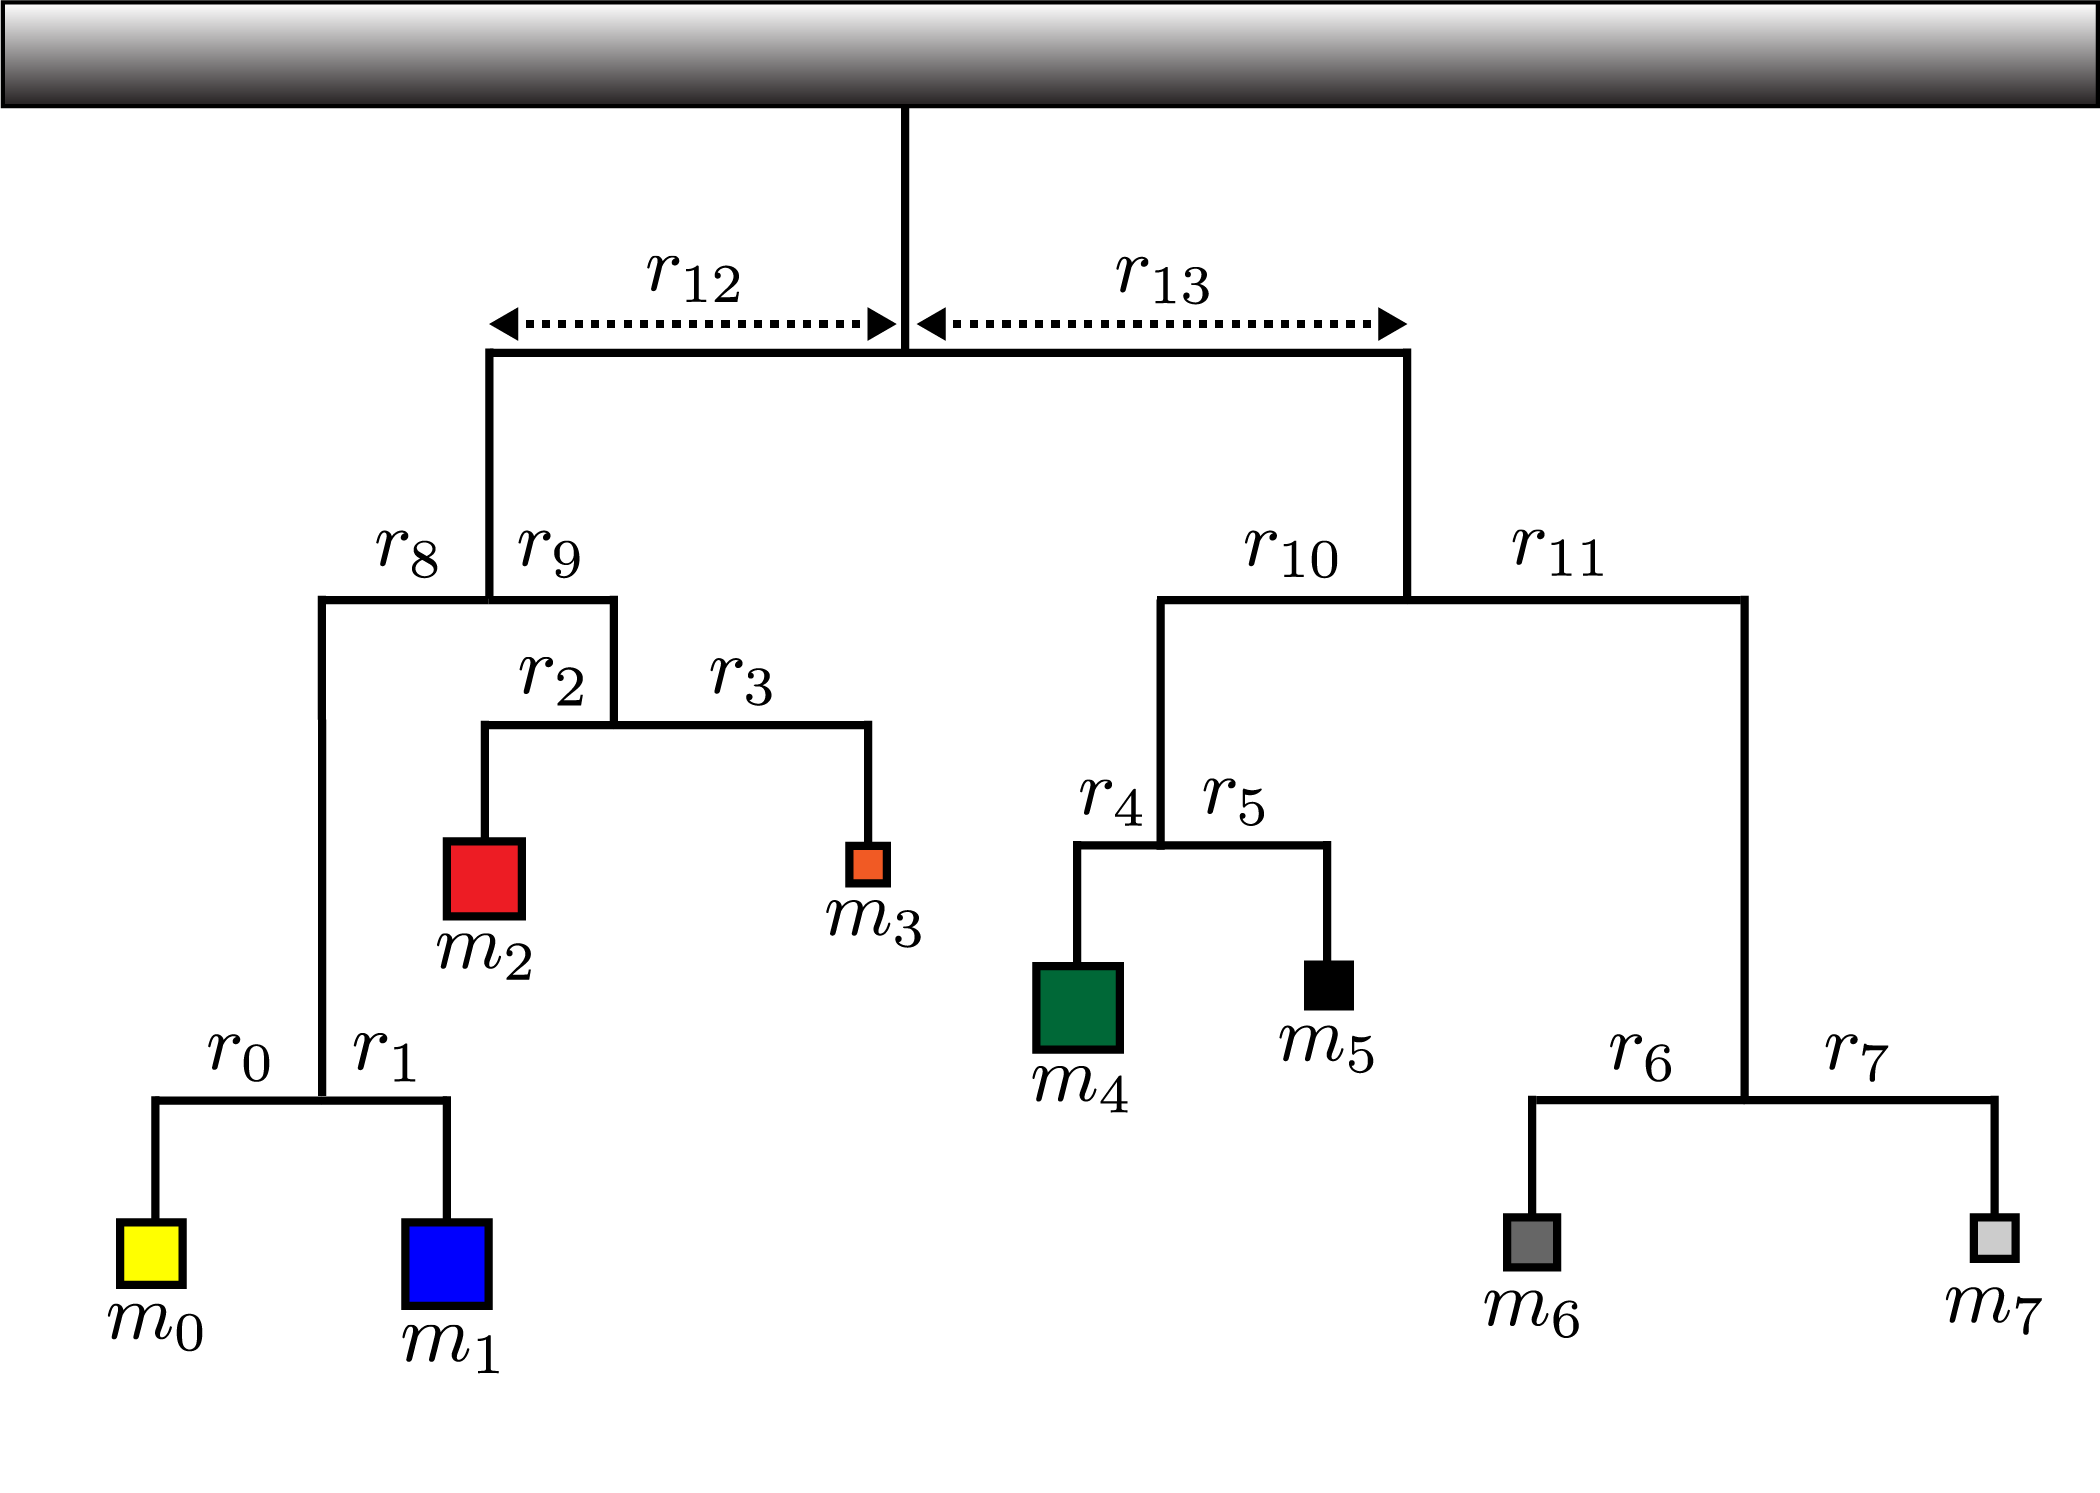

(a) Assume that the mobile is in static equilibrium, and write down all equations necessary to describe this state.

- r0 * m0 - r1 * m1 = 0
- r2 * m2 - r3 * m3 = 0
- r4 * m4 - r5 * m5 = 0
- r6 * m6 - r7 * m7 = 0
- r8 * (m0 + m1) - r9 * (m2 + m3) = 0
- r10 * (m4 + m5) - r11 * (m6 + m7) = 0
- r12 * (m0 + m1 + m2 + m3) - r13 * (m4 + m5 + m6 + m7) = 0


(b) As we did in class, formulate your system of equations into a matrix equation. Here, assume that the individual masses are the unknown variables, but that we do know that the total mass is given by $M = \sum_{i=0}^7 m_i =  22869$ g.

$ \begin{bmatrix}
m0 * r0 & -m1 * r1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & m2 * r2 & -m3 * r3 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & m4 * r4 & -m5 * r5 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & m6 * r6 & -m7 * r7 & 0 \\
r8 * m0 & r8 * m1 & r9 * -m2 & r9 * -m3 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & r10 * m4 & r10 * m5 & r11 * -m6 & r11 * -m7 & 0 \\
r12 * m0 & r12 * m1 & r12 * m2 & r12 * m3 & r13 * -m4 & r13 * -m5 & r13 * -m6 & r13 * -m7 & 0 \\
m0 & m1 & m2 & m3 & m4 & m5 & m6 & m7 & 22869
\end{bmatrix}  $

(c) Now assume that the $r$ values (in cm) are as given below. Define a NumPy array called *rvec* that stores all of these values in the correct order.  

$r_0 = 8$, \
$r_1 = 6$, \
$r_2 = 6$, \
$r_3 = 12$, \
$r_4 = 4$, \
$r_5 = 8$, \
$r_6 = 10$, \
$r_7 = 12$, \
$r_8 = 8$, \
$r_9 = 10$, \
$r_{10} = 12$, \
$r_{11} = 16$, \
$r_{12} = 20$, \
$r_{13} = 24$. \




In [ ]:
rvec = np.array([8, 6, 6, 12, 4, 8, 10, 12, 8, 10, 12, 16, 20, 24])

(d) Create a NumPy array called *mat* that represents the matrix you created in part (b). Rather than hard-coding the values for the various lengths, $r_i$, use array indexing and the a within your matrix definition to reference the proper length values. Recall that to continue a line of code from one line to the next, you can use a "\\" at the end of each line. Breaking the lines at the end of each matrix row is allows you to view your matrix without needing to scroll.

In [ ]:
mat = np.array([[rvec[0], -rvec[1], 0, 0, 0, 0, 0, 0],
                [0, 0, rvec[2], -rvec[3], 0, 0, 0, 0],
                [0, 0, 0, 0, rvec[4], -rvec[5], 0, 0],
                [0, 0, 0, 0, 0, 0, rvec[6], -rvec[7]],
                [rvec[8], rvec[8], -rvec[9], -rvec[9], 0, 0, 0, 0],
                [0, 0, 0, 0, rvec[10], rvec[10], -rvec[11], -rvec[11]],
                [rvec[12], rvec[12], rvec[12], rvec[12], -rvec[13], -rvec[13], -rvec[13], -rvec[13]],
                [1, 1, 1, 1, 1, 1, 1, 1]])
print(mat.shape)

(8, 8)


(e) Define a NumPy array, *bvec*, that represents the vector on the other side of your matrix equation in part (b).

In [ ]:
bvec = np.array([0, 0, 0, 0, 0, 0, 0, 22869])
print(bvec.shape)


(8,)


(f) Invert the matrix you created in part (d) and solve for the mass values that satisfy the static equilibrium assumption.

In [ ]:
mass = np.linalg.inv(mat)@bvec
print(mass)

[2970. 3960. 3696. 1848. 3960. 1980. 2430. 2025.]


(g) Using the masses you found in part (f), confirm that the masses satisfy the equations from part (a).

In [ ]:
# Due to floating point accuracy, we specify a miniscule allowable error
accuracy = 99.999999
allowed_err = 100.0 - accuracy
print(f"Allowed err: {allowed_err}")

# Assets that all pairs have equal torque
for i, j in zip(range(0, len(mass) - 1, 2), range(1, len(mass), 2)):
  diff = mass[i] * rvec[i] - mass[j] * rvec[j]
  assert diff < allowed_err

assert rvec[8] * (mass[0] + mass[1]) - rvec[9] * (mass[2] + mass[3]) < allowed_err
assert rvec[10] * (mass[4] + mass[5]) - rvec[11] * (mass[6] + mass[7]) < allowed_err
assert rvec[12] * (mass[0] + mass[1] + mass[2] + mass[3]) - rvec[13] * (mass[4] + mass[5] + mass[6] + mass[7]) < allowed_err
assert sum(mass) == 22869

Allowed err: 9.999999974752427e-07


3. Write a function called *calder.py* whose inputs are the vector of lengths (assuming the same geometry as in the schematic above) and the total mass. Your function should output the individual mass values in this system.

In [ ]:
def calder(lvec: np.array, total_mass: int) -> np.array:
  mat = np.array([[lvec[0], -lvec[1], 0, 0, 0, 0, 0, 0],
                [0, 0, lvec[2], -lvec[3], 0, 0, 0, 0],
                [0, 0, 0, 0, lvec[4], -lvec[5], 0, 0],
                [0, 0, 0, 0, 0, 0, lvec[6], -lvec[7]],
                [lvec[8], lvec[8], -lvec[9], -lvec[9], 0, 0, 0, 0],
                [0, 0, 0, 0, lvec[10], lvec[10], -lvec[11], -lvec[11]],
                [lvec[12], lvec[12], lvec[12], lvec[12], -lvec[13], -lvec[13], -lvec[13], -lvec[13]],
                [1, 1, 1, 1, 1, 1, 1, 1]])
  
  bvec = np.array([0, 0, 0, 0, 0, 0, 0, total_mass])
  return np.linalg.inv(mat)@bvec

4. Now let's say that we want to minimize the maximum value of any single mass in the system, and that to do this, we have the freedom to adjust $r_{13}$ anywhere in the range of $1$ cm to $50$ cm.

(a) Write a for loop containing your *calder.py* function that iteratively changes the value for $r_{13}$ and records the maximum mass in the system. Be sure to initialize any arrays that you will update within your for loop.

In [ ]:
STEP = 1
MAX_MASS = 22869
y = []
x = []
for i in range(0, 50, STEP):
  x.append(i)
  rvec = np.array([8, 6, 6, 12, 4, 8, 10, 12, 8, 10, 12, 16, 20, i])
  y.append(np.max(calder(rvec, MAX_MASS)))

(b) Create a plot of the maximum mass as a function of the value for $r_{13}$. Be sure to label your axes (including units). From the plot, estimate for what value of $r_{13}$ this maximal mass value is minimized.

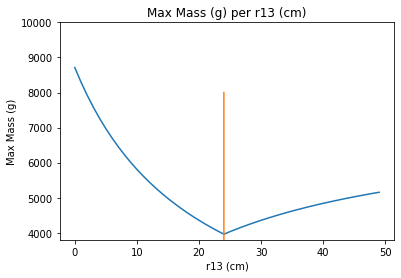

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

ax.plot(x, y)
ax.plot([24 for i in range(5000)], [3000 + i for i in range(5000)])
ax.set(ylabel="Max Mass (g)", xlabel="r13 (cm)", title="Max Mass (g) per r13 (cm)", ylim=(3800,10000))
plt.show()

> At approximately $r_{13} = 24 (cm)$, we minimized the maximum mass

(c) Using the notes from class, write an expression which identitifies the index for which this maximal mass is minimized. What is the maximum mass and the value for $r_{13}$ associated with this index?

In [ ]:
print(f"Index for the minimized maximal mass: {y.index(min(y))}")
print(f"Maximum mass: {min(y):.4f} (g)")

Index for the minimized maximal mass 24
Maximum mass 3960.0000 (g)


5. Bonus Question: Revisit question 2, but this time, assume that we know the masses, $m_i$ as given by the solution you found in question 2, part (f). Assume that you only know some of the lengths, $r_i$ for $i = [1,2,5,7,9,10]$ (use the values from question 2). 

In [ ]:
sum_missing = sum(np.array([8, 12, 4, 10, 8, 16, 20, 24]))
rvec = np.array([0, 6, 6, 0, 0, 8, 0, 12, 0, 10, 12, 0, 0, 0])
masses = mass.copy()


(a) Reformulate your matrix equation in terms of the unknown $r$ values. Note: you'll need an additional constraint to make the problem solvable, so here, assume that while you don't know the indivdual $r$ values, that you do know the sum of the missing values. Use this as a final equation in your formulation.

- r0 = r1 * m1 / m0
- r3 = r2 * m2 / m3
- r4 = r5 * m5 / m4
- r6 = r7 * m7 / m6
- r8 = (r9 * (m2 + m3)) / (m0 + m1)
- r11 = (r10 * (m4 + m5)) / (m6 + m7)
- r12 + r13 = total_sum - sum_missing
- r0 + r3 + r4 + r6 + r8 + r11 + r12 + r13 = sum_missing

$ \begin{bmatrix}
m0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & r1 * m1 \\
0 & m3 & 0 & 0 & 0 & 0 & 0 & 0 & r2 * m2 \\
0 & 0 & m4 & 0 & 0 & 0 & 0 & 0 & r5 * m5 \\
0 & 0 & 0 & m6 & 0 & 0 & 0 & 0 & r7 * m7 \\
0 & 0 & 0 & 0 & m0 + m1 & 0 & 0 & 0 & (r9 * (m2 + m3)) \\
0 & 0 & 0 & 0 & 0 & m6 + m7 & 0 & 0 & (r10 * (m4 + m5)) \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ? \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & sumMissing \\
\end{bmatrix}  $

(b) Define *mat2* as a NumPy array that represents the matrix you created in part (a).  As in the previous problem, rather than hard-coding numbers, use array indexing to reference mass values.

In [ ]:
mat2 = np.array([[masses[0], 0, 0, 0, 0, 0, 0, 0],
                [0, masses[3], 0, 0, 0, 0, 0, 0],
                [0, 0, masses[4], 0, 0, 0, 0, 0],
                [0, 0, 0, masses[6], 0, 0, 0, 0],
                [0, 0, 0, 0, masses[0] + masses[1], 0, 0, 0],
                [0, 0, 0, 0, 0, masses[6] + masses[7], 0, 0],
                [0, 0, 0, 0, 0, 0, sum(masses[0:4]), -sum(masses[4:])],
                [1, 1, 1, 1, 1, 1, 1, 1]])
print(mat2.shape)
# Missing 0, 3, 4, 6, 8, 11, 12, 13

(8, 8)


(c) Create *bvec2*, a NumPy array representing the vector on the other side of your matrix equation. As in part (b), use array indexing to reference values rather than hard-coding mass or length values.

In [ ]:
bvec2 = np.array([rvec[1] * masses[1],
                  rvec[2] * masses[2],
                  rvec[5] * masses[5],
                  rvec[7] * masses[7],
                  rvec[9] * (masses[2] + masses[3]),
                  rvec[10] * (masses[4] + masses[5]),
                  0,
                  sum_missing])
print(bvec2.shape)

(8,)


(d) Use matrix inversion to solve for the unknown $r$ values, and compare to the known values we started with at the beginning of the previous problem.  Do they agree?

In [ ]:
np.linalg.inv(mat2)@bvec2

array([ 8., 12.,  4., 10.,  8., 16., 20., 24.])

Original Missing Values: [8, 12, 4, 10, 8, 16, 20, 24]

We can see that the r values are exactly the same to the original values from the previous problem.